# **Tobacco Usage Method of Preference (California)**

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path

#Import CSV file, Read and Display
csvfile = pd.read_csv("Tobacco_Use_2017_California.csv")

Tobacco_Use_CA = (csvfile[['YEAR', 'LocationDesc', 'TopicDesc', 'MeasureDesc','Response',
                           'Sample_Size','Gender','Data_Value']])
Tobacco_Use_CA.columns = ['Year', 'Location', 'consumption_Type', 'Usage_Measure', 
                          'Usage_Frequency', 'Sample_Size', 'Gender','Data_Value']

**Sample Size**

In [2]:
# Drop rows with no values in 'Sample_Size'
Tobacco_Use_CA =Tobacco_Use_CA.dropna(subset=['Sample_Size'])

Col_SampleSize = Tobacco_Use_CA['Sample_Size'].copy()
percentages = Tobacco_Use_CA['Data_Value']

# Convert percentage values to proportions
proportions = percentages / 100

# Multiply column A by the adjusted percentages
Smokers = Col_SampleSize * proportions

# Add the result as a new column in your DataFrame
Tobacco_Use_CA['Tobacco_Users'] = Smokers
Tobacco_Use_CA

,Year,Location,consumption_Type,Usage_Measure,Usage_Frequency,Sample_Size,Gender,Data_Value,Tobacco_Users
0,2017,California,E-Cigarette Use (Adults),Frequency of Use,Every Day,172.0,Male,38.8,66.736
1,2017,California,Cigarette Use (Adults),Smoking Frequency,Some Days,954.0,Overall,44.0,419.760
2,2017,California,Cigarette Use (Adults),Smoking Frequency,Every Day,954.0,Overall,56.0,534.240
4,2017,California,Cigarette Use (Adults),Smoking Frequency,Every Day,372.0,Female,57.1,212.412
5,2017,California,E-Cigarette Use (Adults),User Status,Current,4236.0,Male,4.3,182.148
6,2017,California,Smokeless Tobacco Use (Adults),Frequency of Use,Every Day,132.0,Overall,43.8,57.816
7,2017,California,Smokeless Tobacco Use (Adults),User Status,Current,4284.0,Male,2.6,111.384
8,2017,California,Cigarette Use (Adults),Smoking Status,Current,4438.0,Female,7.8,346.164
10,2017,California,E-Cigarette Use (Adults),User Status,Current,4411.0,Female,1.8,79.398
11,2017,California,Smokeless Tobacco Use (Adults),User Status,Current,4442.0,Female,0.5,22.210


**Comparison between preferred consumption Type**

consumption_Type
Cigarette Use (Adults)            3876.458
E-Cigarette Use (Adults)          1055.016
Smokeless Tobacco Use (Adults)     511.514
Name: Tobacco_Users, dtype: float64


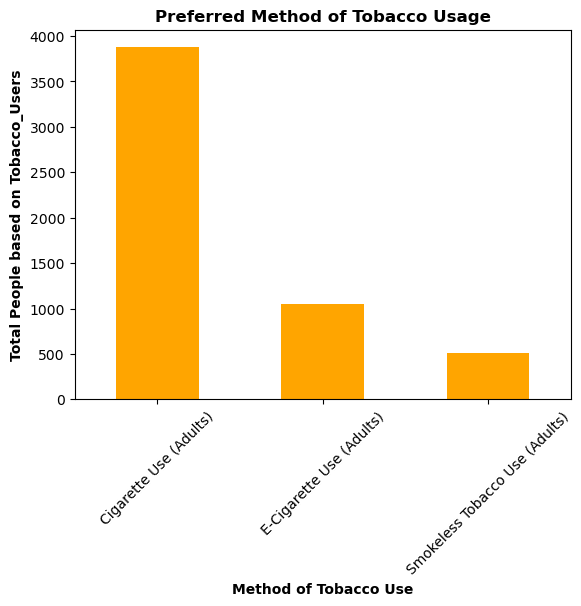

In [5]:
# Filter Data for Method of Tabacco Usage to Tobacco_Users and Graph
consumptionType_df = Tobacco_Use_CA[Tobacco_Use_CA['consumption_Type'].isin(['E-Cigarette Use (Adults)',
                                       'Cigarette Use (Adults)', 
                                       'Smokeless Tobacco Use (Adults)'])]


consumptionType_data = consumptionType_df.groupby('consumption_Type')['Tobacco_Users'].sum().dropna()

print(consumptionType_data)

# Plotting the bar chart
consumptionType_data.plot(kind='bar', color='orange')
plt.title('Preferred Method of Tobacco Usage', fontweight = "bold")
plt.xlabel('Method of Tobacco Use', fontweight = "bold")
plt.ylabel('Total People based on Tobacco_Users', fontweight = "bold")
plt.xticks(rotation=45)
plt.savefig('Preferred_Method_of_Tobacco_Usage.png')
plt.show()

**Analysis:

When comparing preferred consumation method of Tobacco usage in California. Cigarette Use is the most popular method perferred conpared to E-Cigarette Use and Smokeless Tobacco Use also known as chewing tobacco. 

                 consumption_Type Usage_Frequency  Tobacco_Users
0          Cigarette Use (Adults)         Current       1968.458
1          Cigarette Use (Adults)       Every Day       1069.080
2          Cigarette Use (Adults)       Some Days        838.920
3        E-Cigarette Use (Adults)         Current        521.016
4        E-Cigarette Use (Adults)       Every Day        197.333
5        E-Cigarette Use (Adults)       Some Days        336.667
6  Smokeless Tobacco Use (Adults)         Current        264.514
7  Smokeless Tobacco Use (Adults)       Every Day        113.131
8  Smokeless Tobacco Use (Adults)       Some Days        133.869


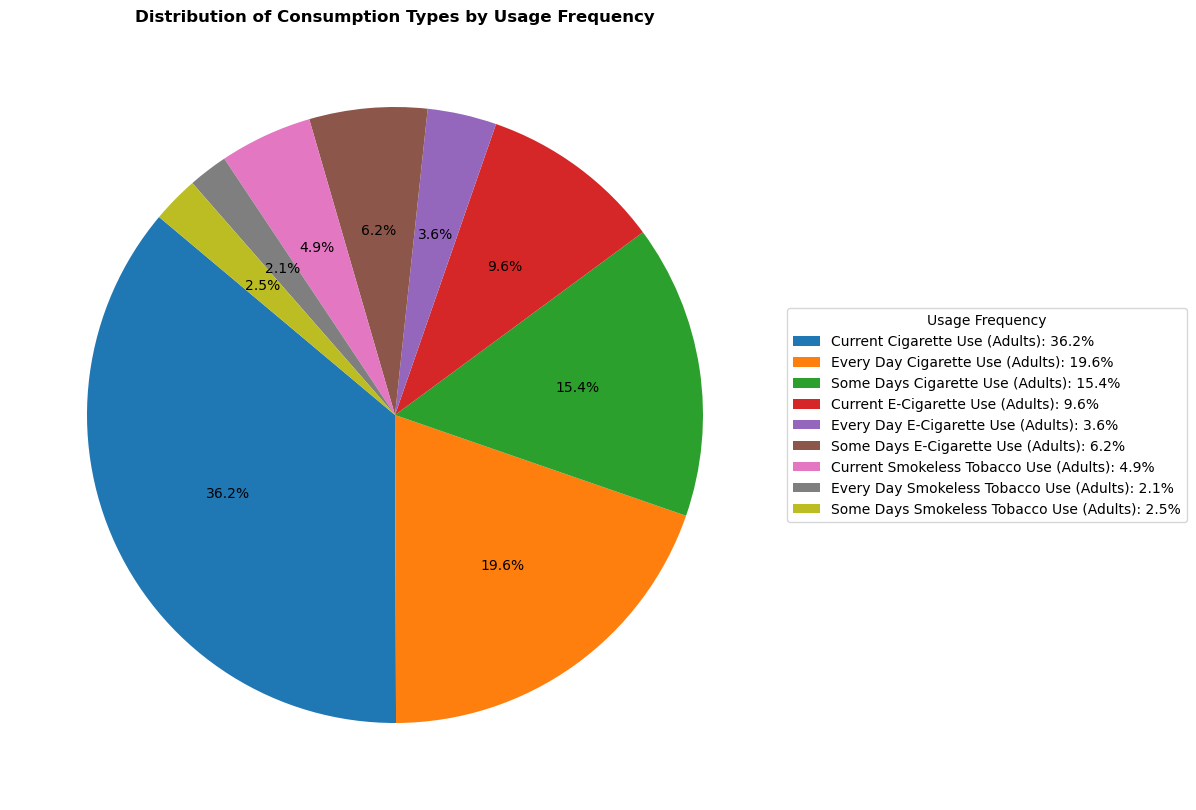

In [7]:
# DataFrame for required consumption_Type and Usage_Frequency
frequency_df = Tobacco_Use_CA[Tobacco_Use_CA['consumption_Type'].isin(['E-Cigarette Use (Adults)', 
                                                                       'Smokeless Tobacco Use (Adults)', 
                                                                       'Cigarette Use (Adults)'])]
frequency_df = frequency_df[frequency_df['Usage_Frequency'].isin(['Current', 'Every Day', 'Some Days'])]

# Group by consumation Type and Usage Frenqency with the Tobacco_Users
grouped_data = frequency_df.groupby(['consumption_Type', 'Usage_Frequency'])['Tobacco_Users'].sum()

# Creating a DataFrame from the grouped data
result_df = grouped_data.reset_index()
print(result_df)


UF = pd.DataFrame(result_df)

# Calculate percentage
UF['Percentage'] = (UF['Tobacco_Users'] / UF['Tobacco_Users'].sum()) * 100


# Plotting a pie chart with percentage labels and explode
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(UF['Percentage'], labels=None, autopct='%1.1f%%', startangle=140)

# Adding legend on the side with percentage labels
legend_labels = [f"{freq}: {percent:.1f}%" for freq, percent in zip(UF['Usage_Frequency'] + ' ' + 
                                                                    UF['consumption_Type'], UF['Percentage'])]
plt.legend(wedges, legend_labels, title='Usage Frequency', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Consumption Types by Usage Frequency', fontweight = "bold")
plt.savefig('Distribution_of_Consumption_Types_by_Usage_Frequency.png')
plt.show()

**Analysis**
When looking at current frequent users, there is not much difference in perference method of consumption. 

Gender                consumption_Type  Female  Male  Overall  Total  \
0               Cigarette Use (Adults)       3     3        3      6   
1             E-Cigarette Use (Adults)       3     3        3      6   
2       Smokeless Tobacco Use (Adults)       1     3        3      4   

Gender  Male (%)  Female (%)  
0           50.0        50.0  
1           50.0        50.0  
2           75.0        25.0  


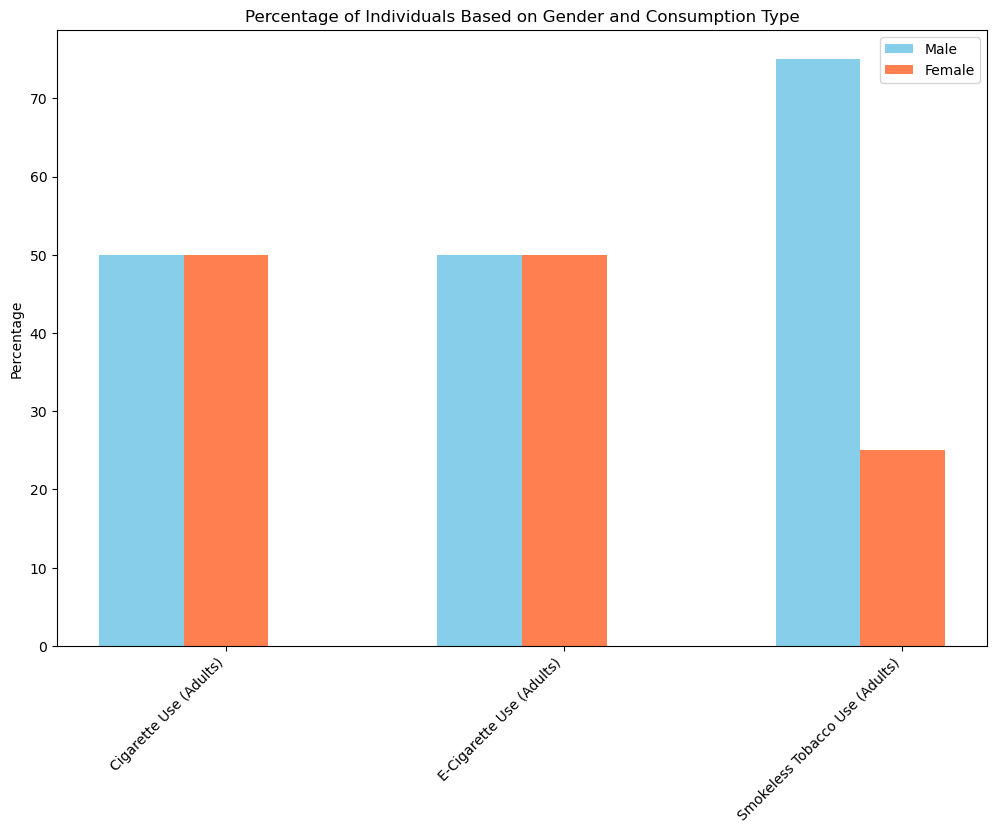

In [8]:


#DataFrame for required Consumation_Type
consumption_types = ['E-Cigarette Use (Adults)', 'Cigarette Use (Adults)', 'Smokeless Tobacco Use (Adults)']
consumption_df = Tobacco_Use_CA[Tobacco_Use_CA['consumption_Type'].isin(consumption_types)]

# Group by Consumation Type and Gender, then calculate the percentage
percentConsume_Gender_df = consumption_df.groupby(['consumption_Type', 'Gender']).size().unstack().reset_index()
percentConsume_Gender_df['Total'] = percentConsume_Gender_df['Male'] + percentConsume_Gender_df['Female'] 
percentConsume_Gender_df['Male (%)'] = (percentConsume_Gender_df['Male'] / percentConsume_Gender_df['Total']) * 100
percentConsume_Gender_df['Female (%)'] = (percentConsume_Gender_df['Female'] / percentConsume_Gender_df['Total']) * 100
print(percentConsume_Gender_df)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
bar_positions_male = range(len(percentConsume_Gender_df['consumption_Type']))
bar_positions_female = [pos + bar_width for pos in bar_positions_male]
bar_positions_overall = [pos + 2 * bar_width for pos in bar_positions_male]

ax.bar(bar_positions_male, percentConsume_Gender_df['Male (%)'], width=bar_width, label='Male', color="skyblue")
ax.bar(bar_positions_female, percentConsume_Gender_df['Female (%)'], width=bar_width, label='Female', color="Coral")


ax.set_xticks([pos + bar_width for pos in bar_positions_male])
ax.set_xticklabels(percentConsume_Gender_df['consumption_Type'], rotation=45, ha='right')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Individuals Based on Gender and Consumption Type')
ax.legend()

plt.show()

**Analysis** 
When looking at preferences based on Gender we see that males preferred smokeless Tobacco Use than females 

**Summary Statistics**

In [9]:
values_column = Tobacco_Use_CA['Data_Value']  
weights_column = Tobacco_Use_CA['Sample_Size'] 

# Calculate the weighted average
weighted_avg = np.average(values_column, weights=weights_column)
print("Weighted Average:", weighted_avg)

median_value = Tobacco_Use_CA['Data_Value'].median()
print("Median:", median_value)

range_value = Tobacco_Use_CA['Data_Value'].max() - Tobacco_Use_CA['Data_Value'].min()
print("Range:", range_value)

Weighted Average: 9.456198749131342
Median: 42.9
Range: 66.3


**Analysis** The data for California reveals a weighted average of 9.45, a median value of 42.9, and a range of 66.3 